# Introduction about PCA

PCA (Principal Component Analysis) is a technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize. PCA is also a technique widely used in the field of bioinformatics for the analysis of gene expression data, and for the analysis of data from other high-throughput technologies.




PCA is a powerful statistical technique that helps in understanding the underlying structure of large datasets, particularly useful in fields like bioinformatics, genomics, and other high-throughput technologies. Let's dive into the basics and apply PCA on a real dataset.

## What is PCA?

PCA is a dimensionality reduction technique that transforms a large set of variables into a smaller one that still contains most of the information in the large set. The goal is to reduce the dimensionality of the data by finding a new set of variables, the principal components, which are uncorrelated, and which are ordered by the amount of variance they capture from the data.

## Why use PCA?

- **Data Visualization**: Simplify the complexity in high-dimensional data while retaining the trend and patterns.
- **Feature Extraction and Engineering**: Reduce the number of variables in a dataset, by combining them into a set of principal components, without losing much information.
- **Noise Reduction**: Eliminate noise by focusing on the components that maximize variance.
- **Efficiency**: Improve computational and storage efficiency for high-dimensional data.


## Important concepts in PCA

### Principal Components

Principal components are the new set of variables that are obtained from the original variables by linear transformation. The first principal component captures the most variance in the data, and each subsequent component captures the remaining variance in decreasing order.

### Eigenvalues and Eigenvectors

Eigenvalues and eigenvectors are the mathematical concepts behind PCA. Eigenvalues represent the amount of variance captured by each principal component, while eigenvectors represent the direction of the principal components in the original feature space.

### Variance Explained

Variance explained is the proportion of variance in the data that is captured by each principal component. It helps us understand how much information is retained by each component.

### Scree Plot

A scree plot is a graphical representation of the eigenvalues of the principal components. It helps us visualize the amount of variance captured by each component and decide how many components to retain.

### Loading Scores

Loading scores represent the correlation between the original variables and the principal components. They help us understand the contribution of each variable to the principal components.

### Biplot

A biplot is a graphical representation of the loading scores and the sample scores in the reduced space. It helps us visualize the relationship between variables and samples in the reduced space.


## Hands-on Example: PCA in Action

Let's apply PCA on a dataset to see how it works in practice. We'll use a gene expression dataset as an example, which is common in bioinformatics.

### Step 1: Import Necessary Libraries

First, we need to import the libraries necessary for our analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Step 2: Load and Prepare the Dataset

For this example, we'll simulate a gene expression dataset. In real-life scenarios, this data might come from high-throughput sequencing experiments.

In [2]:
# Simulating a gene expression dataset
np.random.seed(0)
gene_data = np.random.rand(100, 50)  # 100 samples and 50 genes
samples = ['Sample_' + str(i) for i in range(1, 101)]
genes = ['Gene_' + str(i) for i in range(1, 51)]

# Creating a DataFrame
df_gene = pd.DataFrame(data=gene_data, index=samples, columns=genes)

# Display the first few rows of the dataset
df_gene.head()

,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,Gene_10,...,Gene_41,Gene_42,Gene_43,Gene_44,Gene_45,Gene_46,Gene_47,Gene_48,Gene_49,Gene_50
Sample_1,0.548814,0.715189,0.602763,0.544883,0.423655,0.645894,0.437587,0.891773,0.963663,0.383442,...,0.359508,0.437032,0.697631,0.060225,0.666767,0.670638,0.210383,0.128926,0.315428,0.363711
Sample_2,0.570197,0.438602,0.988374,0.102045,0.208877,0.161310,0.653108,0.253292,0.466311,0.244426,...,0.318569,0.667410,0.131798,0.716327,0.289406,0.183191,0.586513,0.020108,0.828940,0.004695
Sample_3,0.677817,0.270008,0.735194,0.962189,0.248753,0.576157,0.592042,0.572252,0.223082,0.952749,...,0.896547,0.367562,0.435865,0.891923,0.806194,0.703889,0.100227,0.919483,0.714241,0.998847
Sample_4,0.149448,0.868126,0.162493,0.615560,0.123820,0.848008,0.807319,0.569101,0.407183,0.069167,...,0.398221,0.209844,0.186193,0.944372,0.739551,0.490459,0.227415,0.254356,0.058029,0.434417
Sample_5,0.311796,0.696343,0.377752,0.179604,0.024679,0.067250,0.679393,0.453697,0.536579,0.896671,...,0.863856,0.117532,0.517379,0.132068,0.716860,0.396060,0.565421,0.183280,0.144848,0.488056


### Step 3: Standardize the Data

PCA is affected by scale, so we need to scale the features in our data before applying PCA. We will standardize the gene expression data to have a mean of 0 and a standard deviation of 1.

In [3]:
# Standardizing the features
scaler = StandardScaler()
df_gene_scaled = scaler.fit_transform(df_gene)

# Checking the standardized data
print(df_gene_scaled.mean(axis=0)[:5])  # Should be close to 0
print(df_gene_scaled.std(axis=0)[:5])  # Should be close to 1

[-8.99280650e-17  4.83640905e-17  1.17683641e-16 -3.01980663e-16
  2.77555756e-17]
[1. 1. 1. 1. 1.]


### Step 4: Apply PCA

Now, let's apply PCA to reduce the dimensionality of our gene expression dataset from 50 dimensions (genes) to 2 principal components. This will allow us to visualize the dataset in a 2D space.

In [7]:
# Initializing PCA
pca = PCA(n_components=2)

# Fitting PCA on the standardized data
principalComponents = pca.fit_transform(df_gene_scaled)

# Creating a DataFrame with the principal components
df_pca = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'], index=samples)

# Display the first few rows of the PCA transformed data
df_pca.head()

,Principal Component 1,Principal Component 2
Sample_1,-1.261112,-0.944955
Sample_2,0.675727,0.685626
Sample_3,0.799683,2.153984
Sample_4,0.604753,0.734807
Sample_5,-0.316385,0.306273


### Step 5: Visualize the PCA Result

Finally, let's visualize the result of PCA using a scatter plot. This will help us understand the distribution of our samples in the reduced space.

## Score plot

A score plot is a graphical representation of the samples in the reduced space of the principal components. It helps us visualize the distribution of samples in the reduced space and identify patterns or clusters in the data.


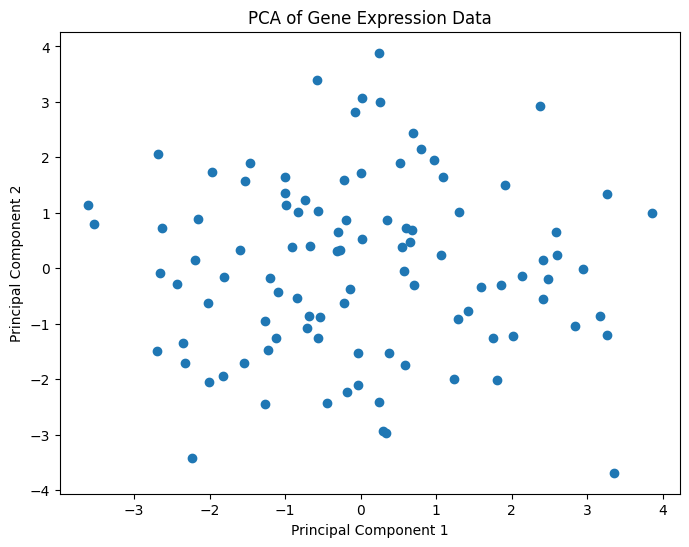

In [ ]:
# Score plot
plt.figure(figsize=(8,6))
plt.scatter(principalComponents_full[:, 0], principalComponents_full[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Gene Expression Data')
plt.show()


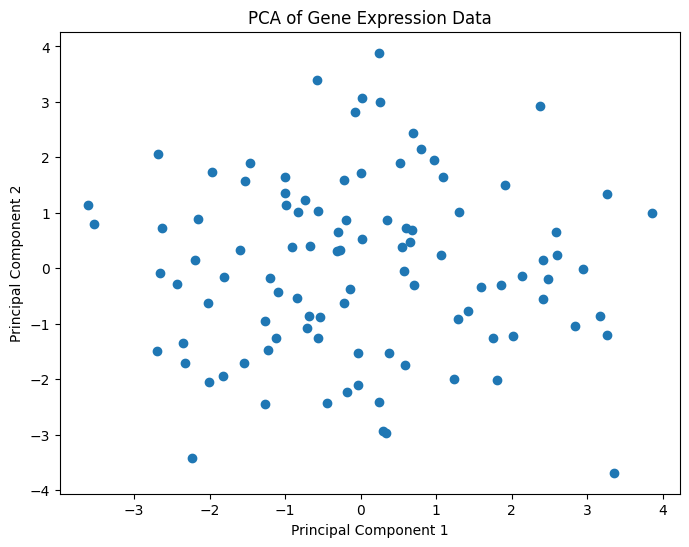

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Gene Expression Data')
plt.show()

In [11]:
# Explained variance ratio
print(pca.explained_variance_ratio_) # Explained variance of each principal component
print(pca.explained_variance_ratio_.sum()) # Total explained variance
# Understanding the explained variance ratio
print(pca.explained_variance_ratio_ * 100) # Explained variance of each principal component in percentage
print(pca.explained_variance_ratio_.sum() * 100) # Total explained variance in percentage


[0.05625045 0.04943072]
0.10568117624076481
[5.62504539 4.94307224]
10.568117624076482



## Variance explained by each principal component

Variability explained by each principal component is an important aspect of PCA. It helps us understand how much information is retained by each component. The cumulative variance explained by all the principal components can be used to decide how many components to retain.

Values close to 1 indicate that the component captures a large amount of variance in the data, while values close to 0 indicate that the component captures very little variance.

**Components are usually ordered by the amount of variance they capture, with the first component capturing the most variance, the second component capturing the second most variance, and so on.**



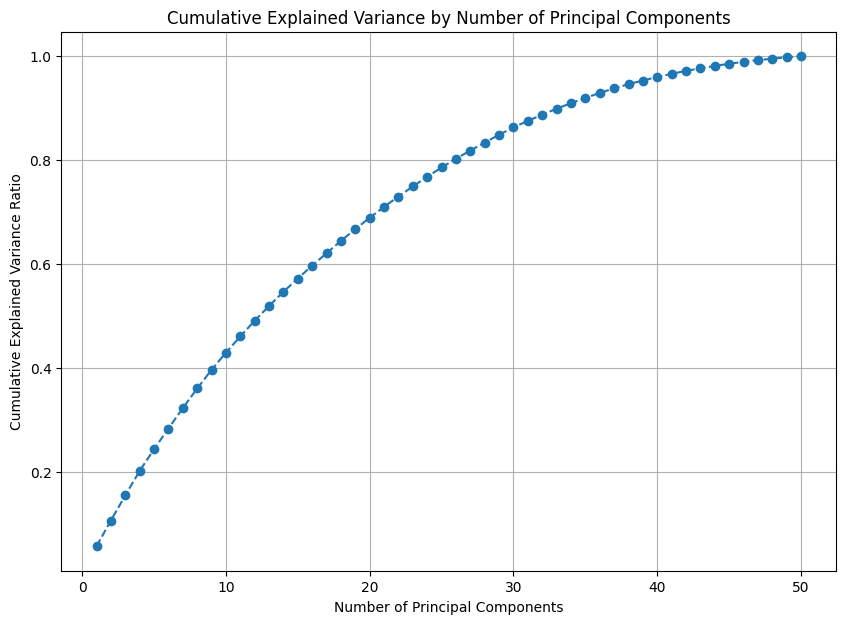

In [17]:
# Step 1: Perform PCA without specifying the number of components
pca_full = PCA()
principalComponents_full = pca_full.fit_transform(df_gene_scaled)

# Step 2: Calculate the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Step 3: Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


## Loadings plot

Loadings scores represent the correlation between the original variables and the principal components. High loading scores indicate that the variable contributes significantly to the principal component, while low loading scores indicate that the variable has little impact on the component.

A loadings plot is a graphical representation of the variables in the reduced space of the principal components. It helps us understand the contribution of each variable to the principal components and identify the variables that are most important in explaining the variance in the data.


In [19]:
# Loading scores
loading_scores = pca.components_.T * np.sqrt(pca.explained_variance_)
df_loading_scores = pd.DataFrame(data=loading_scores, columns=['Principal Component 1', 'Principal Component 2'], index=genes)

# Display the loading scores
df_loading_scores.head()

,Principal Component 1,Principal Component 2
Gene_1,0.485469,0.050651
Gene_2,-0.157812,-0.338372
Gene_3,0.081259,0.346014
Gene_4,0.090567,-0.028143
Gene_5,-0.201834,-0.225091


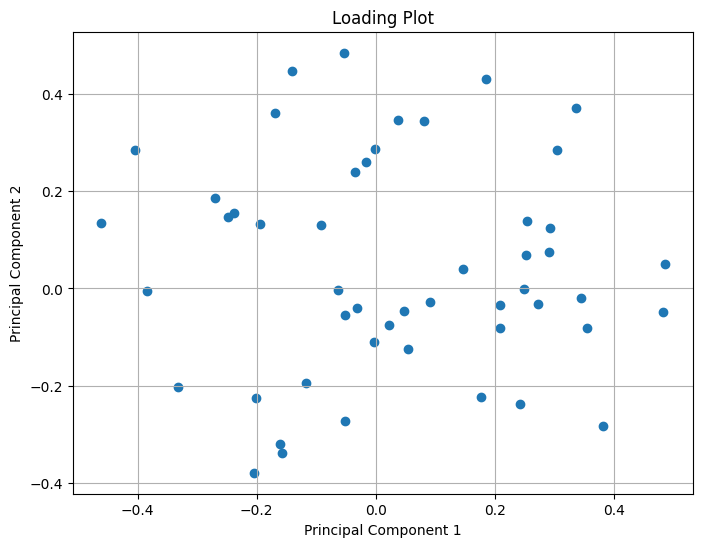

In [20]:
# Loading plot
plt.figure(figsize=(8,6))
plt.scatter(df_loading_scores['Principal Component 1'], df_loading_scores['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Loading Plot')
plt.grid()
plt.show()


## Conclusion

Congratulations! You've just performed PCA on a gene expression dataset. By reducing the dimensionality of the data, we were able to visualize the distribution of samples in a 2D space, which can be incredibly useful for exploratory data analysis in bioinformatics and other fields.

Remember, PCA is a versatile tool and can be applied to various types of data. The key is to understand the assumptions and limitations of PCA to make the most out of this powerful technique.